# Aufgabe 2

Alfredo - stolzer Besitzer der Pizzeria Bella Capri - möchte seine Prozesse verbessern. Zum Beispiel:

 1. möchte er abschätzen können, wie viele Pizzas, wie viel frischen Salat und wie viele Nudeln er pro Tag benötigt. 
 2. Desweiteren möchte er gerne abschätzen, was er an verschiedenen Getränken besorgen muss.
 3. Da die Zahl der täglichen Gäste vermutlich schwer genau vorherzusagen ist überlegt er, ob es wohl einen (linearen) Zusammenhang 
    zwischen den Vorab-Reservierungen und der Gesamtzahl der Gäste pro Tag gibt, so dass er Anhand der Reservierungen eine Vorhersage 
    über die zu erwartende Gesamtzahl der Gäste treffen kann.
 4. Außerdem möchte er entscheiden, an welchem Tag er zukünftig Ruhetag machen soll.

Dazu erstellt er über einen Monat hinweg die Tabelle "BellaCapri.xlsx" und hofft dass er einen Datenanalysten findet, der ihm seine 
Fragen mit Hilfe eines Computerprogramms beantworten kann.

Können Sie Alfredo helfen und ihm ein paar nützliche Analysen und Graphiken mit Hilfe von Pandas, NumPy und Matplotlib erstellen?

Hinweis: die Aufgabe lässt Gestaltungsspielraum. Ich bin gespannt auf ihre individuellen Lösungen.

Quelldatei:

BellaCapri.xlsx

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Food

### Load Data

Excel file has two sheets, 'Gerichte' is the one for food. Date can be used as index.

In [2]:
food = pd.read_excel('BellaCapri.xlsx', sheet_name='Gerichte', index_col='Datum')

### Get Basic Understanding

Check what the data looks like and if it's complete.
What are the relvant columns?
How can the data be sturctured?

1. Check basic information
2. Take a look at the dataframe
3. Plot data

#### Basic Information

In [3]:
display(food.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 01.02.21 to 28.03.21
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Wochentag       56 non-null     object
 1   Reservierungen  56 non-null     int64 
 2   Besucher        56 non-null     int64 
 3   Pizza           56 non-null     int64 
 4   Pasta           56 non-null     int64 
 5   Salat           56 non-null     int64 
 6   Vorspeise       56 non-null     int64 
 7   Sonstiges       56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.9+ KB


None

- DataFrame has 56 entires from 01.02 to 28.03 and is complete. No NaNs so no pre proccessing needed.
- important columns are 'Resiervierungen' and 'Besucher'. They will be used to check for a linear connection.
- there are more columns for the food then were references in the task description. Fokus is on 'Pizza', 'Pasta' and 'Salat'

Add a column for the main dishes and drop the others:

In [4]:
food['Hauptgerichte'] = food.Pizza + food.Pasta + food.Salat
food = food.loc[:, ['Wochentag', 'Reservierungen', 'Besucher', 'Hauptgerichte', 'Pizza', 'Pasta', 'Salat']];

### DataFrame

In [5]:
display(food.head(8))

,Wochentag,Reservierungen,Besucher,Hauptgerichte,Pizza,Pasta,Salat
Datum,,,,,,,
01.02.21,Mo,10,127,111,56,32,23
02.02.21,Di,10,71,60,33,15,12
03.02.21,Mi,14,153,126,55,41,30
04.02.21,Do,16,226,182,82,53,47
05.02.21,Fr,27,299,251,115,76,60
06.02.21,Sa,29,415,349,167,102,80
07.02.21,So,25,231,186,90,53,43
08.02.21,Mo,10,135,121,60,35,26


- data available for the whole week

#### Simple Plot of the relevant Data

In [6]:
plt.style.use('seaborn-v0_8-darkgrid')

In [7]:
data_columns_food = food.drop('Wochentag', axis=1)
main_dishes = ['Hauptgerichte', 'Pizza', 'Pasta', 'Salat']

c_food = {
    'Reservierungen': 'darkblue',
    'Besucher': 'darkorange',
    'Hauptgerichte': 'darkgreen', 
    'Pizza': 'red',
    'Pasta': 'purple',
    'Salat': 'olive',
}
ls_food = {
    'Reservierungen': 'solid',
    'Hauptgerichte': 'dashed',
    'Besucher': 'dotted',
    'Pizza': 'dashdot',
    'Pasta': (0, (1, 1)),
    'Salat': (0, (3, 1, 1, 1)) # densly dashdotted
}

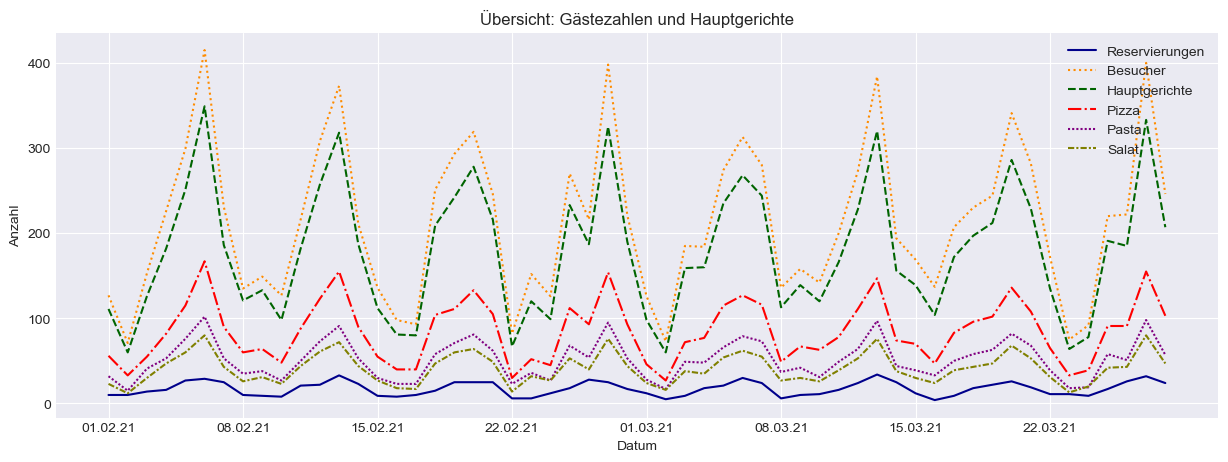

In [8]:
# create figure
fig, ax = plt.subplots(figsize=(15, 5))

# plot data
for column_name in data_columns_food:
    ax.plot(food.index, food[column_name], color=c_food[column_name], linestyle=ls_food[column_name], label=column_name)  

# set axis labels
ax.set_xlabel('Datum')
ax.set_ylabel('Anzahl')

# set clear ticks
week_starts = list(food.index[::7])
ax.set_xticks(week_starts); # set ticks
ax.set_xticklabels(week_starts); # set labels

# set title and legend
ax.set_title("Übersicht: Gästezahlen und Hauptgerichte")
ax.legend();

- dependence between customers and food is obvious
- not every customer orders a main dish
- dependence between reservations and customers seems to be existent to some extent
- further analysis on the matter has to be done to decide

In [9]:
# # create figure
# fig, (ax_food, ax_cust) = plt.subplots(2, 1, figsize=(15, 5))

# lower_lim = food[main_dishes].min()
# upper_lim = food[main_dishes].max()
# bins = upper_lim - lower_lim

# # for col_name in ['Pizza', 'Pasta', 'Salat']:
# ax_food.hist(food['Pizza', 'Pasta', 'Salat'], histtype='stepfilled', alpha=0.5, color=c_food[col_name], label=col_name)

# for col_name in ['Reservierungen', 'Besucher']:
#     ax_cust.hist(food[col_name], histtype='stepfilled', alpha=0.5, color=c_food[col_name], label=col_name)
    
# # set axis labels
# ax_food.set_ylabel('Bestellungen')

# # set titles and legend
# fig.suptitle('Häufigkeiten: Gästezahlen und Hauptgerichte')
# ax_food.legend()
# ax_cust.legend()



#### Mean and Standard Deviation

In [10]:
display(food.head())

,Wochentag,Reservierungen,Besucher,Hauptgerichte,Pizza,Pasta,Salat
Datum,,,,,,,
01.02.21,Mo,10,127,111,56,32,23
02.02.21,Di,10,71,60,33,15,12
03.02.21,Mi,14,153,126,55,41,30
04.02.21,Do,16,226,182,82,53,47
05.02.21,Fr,27,299,251,115,76,60


In [11]:
food_stats = pd.DataFrame()
food_stats['Mittelwert'] = food.drop("Wochentag", axis=1).mean()
food_stats['Standardabweichung'] = food.drop("Wochentag", axis=1).std()

display(food_stats)

,Mittelwert,Standardabweichung
Reservierungen,17.339286,8.220322
Besucher,212.517857,90.236254
Hauptgerichte,178.535714,76.500497
Pizza,85.375000,36.230857
Pasta,51.785714,22.570064
Salat,41.375000,17.993496


### Analyse Dependence between Customers and Main Dishes

1. Split Data in Training and Test Sets
2. Calculate Regreessions
3. Plot data

#### Split Data in Training and in Test Sets

In [12]:
test_food = food.sample(frac=0.2, random_state=22)
train_food = food.drop(test_food.index)

#### Calculate Regressions

In [13]:
# x and y values for linear functions
x = np.array(range(food.Besucher.min(), food.Besucher.max())) # use food for complete range

# Customer - Main Dishes 
regs_customers = {c_name: np.poly1d(np.polyfit(x=test_food.Besucher, y=test_food[c_name], deg=1))(x) for c_name in main_dishes}
# Reservations - Main Dishes
regs_reservations = {c_name: np.poly1d(np.polyfit(x=test_food.Reservierungen, y=test_food[c_name], deg=1))(x) for c_name in main_dishes}
# Reservations - Customers
regs_res_cust = {'Reservierungen': np.poly1d(np.polyfit(x=test_food.Reservierungen, y=test_food.Besucher, deg=1))(x)}

#### Calculate Measures

RMSE: 

In [16]:
def calc_rmse(df):
    """Takes DataFrame as input. Calculates Root Mean Square Error (RMSE)"""
    pass

#### Linear Regressions

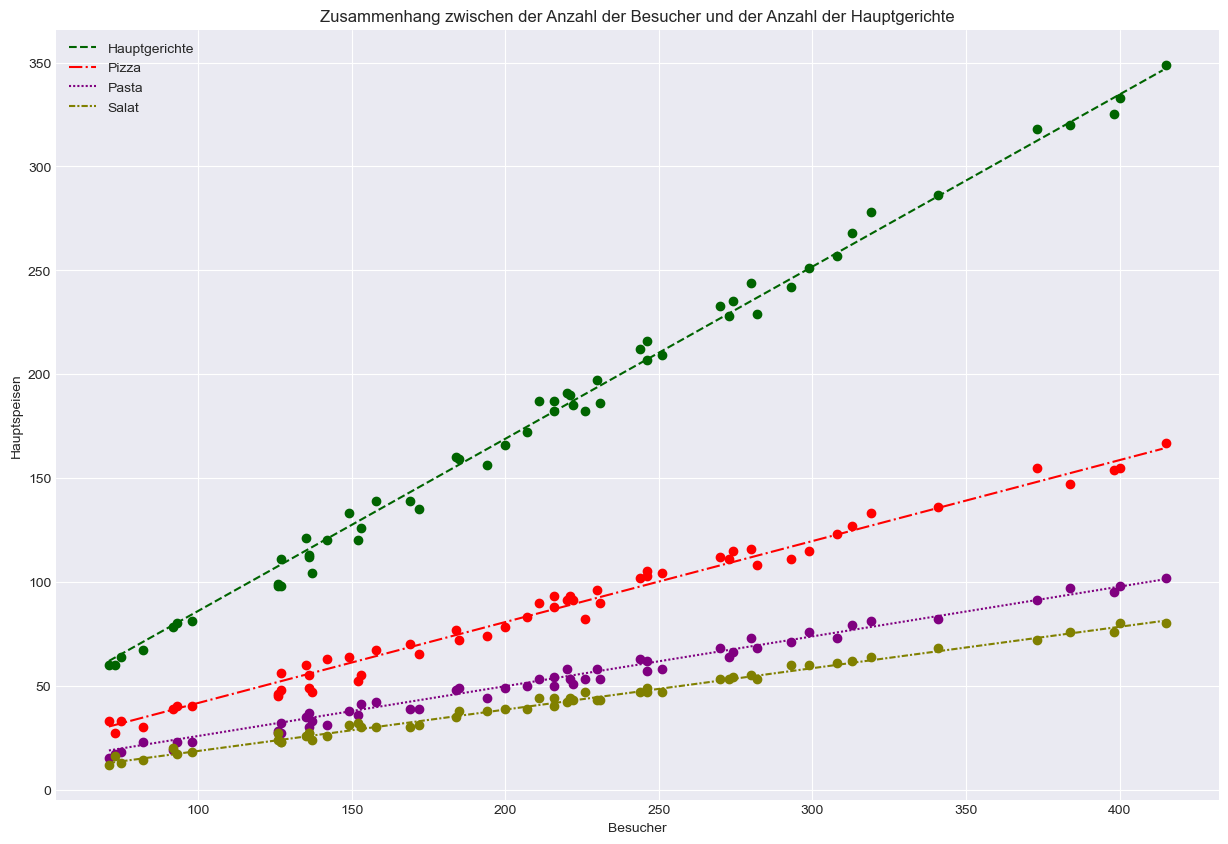

In [15]:
# create figure
fig, ax = plt.subplots(figsize=(15, 10))

# plot data
for c_name in main_dishes:
    ax.plot(x, regs_customers[c_name], color=c_food[c_name], linestyle=ls_food[c_name], label=c_name)  
    ax.scatter(food.Besucher, food[c_name], color=c_food[c_name])

# set axis labels
ax.set_xlabel('Besucher')
ax.set_ylabel('Hauptspeisen')

# set title and legend
ax.set_title("Zusammenhang zwischen der Anzahl der Besucher und der Anzahl der Hauptgerichte")
ax.legend();

From first glance the dependence between customers and the main dishes seems pretty linear. 
This was expected as there is a causal dependece between them. Eventhough not every customer has to buy a main dish.

The deviations seem a little larger for Pizza. So let's take a look at how good the regressions are.

#### Mean and Standard Deviation